<a href="https://colab.research.google.com/github/yourlocalbard/PersonalRepo/blob/main/Skilled_Nursing_Facility_Data_Analysis_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Skilled Nursing Facility Data Analysis ##
Data is downloaded from https://healthdata.gov/dataset/provider-info (the CSV file)

**Section 1 - An initial look at the data**

Load the pandas package and the csv file (named 'provider_info.csv'). You might need to use path /content/Provider_Info.csv

In [14]:
import pandas as pd
snf = pd.read_csv('Provider_Info.csv')

Look at the first five rows of the data

In [15]:
snf.head(5)

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County,Provider County Name,Ownership Type,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,365333,BOWLING GREEN MANOR,1021 W POE RD,BOWLING GREEN,OH,43402,4193524694,880,Wood,For profit - Corporation,...,8,40.667,0,4,0,0,0,0,"1021 W POE RD BOWLING GREEN, OH 43402 (41.3862...",07/01/2020
1,315254,ALARIS HEALTH AT BOULEVARD EAST,6819 BOULEVARD EAST,GUTTENBERG,NJ,7093,2018683600,230,Hudson,For profit - Corporation,...,4,3.333,0,0,0,0,0,0,"6819 BOULEVARD EAST GUTTENBERG, NJ 07093 (40.7...",07/01/2020
2,325071,AZTEC HEALTHCARE,500 CARE LANE,AZTEC,NM,87410,5053349445,220,San Juan,For profit - Partnership,...,84,104.000,1,4,0,0,0,0,"500 CARE LANE AZTEC, NM 87410 (36.835292, -108...",07/01/2020
3,265873,UNION CARE CENTER,1080 MARIE LANE,UNION,MO,63084,6362068585,350,Franklin,For profit - Corporation,...,.,14.400,0,0,0,0,0,0,NaN,07/01/2020
4,495309,PELICAN HEALTH NORFOLK,827 NORVIEW AVENUE,NORFOLK,VA,23509,7578536281,641,Norfolk City,For profit - Partnership,...,44,82.667,0,18,0,0,0,0,"827 NORVIEW AVENUE NORFOLK, VA 23509 (36.89048...",07/01/2020


How many rows and columns in this dataset?

In [16]:
snf.shape

(15404, 86)

Take a look at all the columns in text form

In [17]:
snf.columns

Index(['Federal Provider Number', 'Provider Name', 'Provider Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Provider Phone Number', 'Provider SSA County', 'Provider County Name',
       'Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents Per Day', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid services',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Long-Stay QM Rating', 'Long-Stay QM Rating Footnote',
       'S

Check for NAs or blank cells

In [9]:
snf.isna().sum()

,0
365333,0
BOWLING GREEN MANOR,0
1021 W POE RD,0
BOWLING GREEN,0
OH,0
...,...
0.6,0
0.7,0
0.8,0
"1021 W POE RD BOWLING GREEN, OH 43402 (41.386226, -83.670342)",1138


Looks like there's some amount of missing data. We won't do anything with it for now, but if we use one of these columns with missing data later on, we should be aware.

**Section 2 - Initial analysis of the data**

Overall rating appears to be graded on a scale of 1 to 5, whole numbers only. How many facilities have an overall rating of 5? 4? 3? 2? 1?

In [18]:
snf.head()
snf['Overall Rating'].value_counts()

,count
Overall Rating,
5.0,3868
4.0,3266
2.0,2988
3.0,2735
1.0,2348


What is the average overall rating for all the facilities?

In [20]:
snf['Overall Rating'].mean()

3.2182176915488325

What is the average overall rating for facilities by state? (Hint: Use 'Provider State'). Sort by highest rating to lowest.

In [21]:
snf.groupby('Provider State')['Overall Rating'].mean()

,Overall Rating
Provider State,
AK,3.722222
AL,3.438053
AR,3.068493
AZ,3.423611
CA,3.487267
CO,3.626126
CT,3.476415
DC,4.055556
DE,3.844444


Visualize the top 10 states for overall facility ratings in a horizontal bar chart, with highest rating on top, lowest rating on the bottom.  
  
*Note:* Use ascending=True and .tail instead of .head. Normally, it would make sense to use ascending=False and .head for top 10 high to low, but for a horizontal bar chart, it starts at the bottom so the frame of reference is reversed.

<Axes: ylabel='Provider State'>

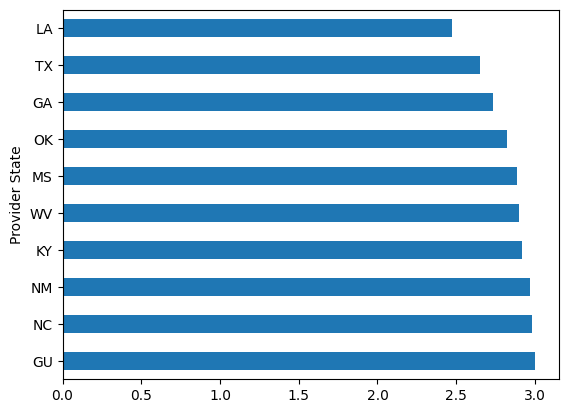

In [22]:
snf.groupby('Provider State')['Overall Rating'].mean().sort_values(ascending = False).tail(10).plot(kind='barh')

Looks like Hawaii has some nice skilled nursing facilities in addition to beautiful beaches. Maybe we should retire there? Puerto Rico might be nice too!

**Section 3 - Does having more nurses per resident lead to better facility ratings?**

Let's look at 'Adjusted RN Staffing Hours per Resident per Day' by 'Overall Rating'

In [27]:
snf.groupby('Overall Rating')['Adjusted RN Staffing Hours per Resident per Day'].mean()

,Adjusted RN Staffing Hours per Resident per Day
Overall Rating,
1.0,0.427126
2.0,0.589597
3.0,0.612804
4.0,0.739330
5.0,0.994129


Looks like there's some correlation there. Let's dig deeper and see which states have a higher nurse per resident ratio.

What is the average 'Adjusted RN Staffing Hours per Resident per Day' for Hawaii (ranked #1 in average overall rating)? Hawaii is abbreviated as 'HI' in the dataset

In [30]:
snf[snf['Provider State'] == 'HI']['Adjusted RN Staffing Hours per Resident per Day'].mean()

1.6482578048780487

What is the average 'Adjusted RN Staffing Hours per Resident per Day' for Louisiana (ranked last in average overall rating)? Louisiana is abbreviated as 'LA' in the dataset

In [31]:
snf[snf['Provider State'] == 'LA']['Adjusted RN Staffing Hours per Resident per Day'].mean()

0.29496462406015034

Looks like we should avoid Louisiana if we want to go to a quality skilled nursing facility and receive adequate nursing attention!

**Section 4 - Let's create our own facility rating algorithm!**

Our own rating system will be similar to the overall rating - the higher the number, the better the facility.

*For discussion* What columns should we use?

Let's use the columns below

'Adjusted Total Nurse Staffing Hours per Resident per Day' -> the higher the better  
'Reported Physical Therapist Staffing Hours per Resident Per Day' -> the higher the better  
'Number of Facility Reported Incidents' -> the lower the better  

Create a column called 'our rating' by adding the first two colums above and then subtracting the bottom column

In [46]:
snf['Our Rating'] = snf['Adjusted Total Nurse Staffing Hours per Resident per Day'] + snf['Reported Physical Therapist Staffing Hours per Resident Per Day']

What is the average and the range of 'our rating'? What is the 75th percentile?

In [47]:
snf['Our Rating'].describe()

,Our Rating
count,14866.000000
mean,3.946567
std,0.903272
min,1.393870
25%,3.362493
50%,3.824420
75%,4.348125
max,12.439890


In [40]:
#Average
snf['Our Rating'].mean()

3.7966570839499534

In [48]:
#Range
snf['Our Rating'].max() - snf['Our Rating'].min()

11.04602

Create a new column called 'top quartile' that says 'yes' if 'our rating' is 75 percentile and above and no if it is below that.

In [51]:
snf['Our Rating'].quantile(.75)

4.348125

In [63]:
# Step 1: Create the formula (function)
def top_quartile(x):
    if x['Our Rating'] >= snf['Our Rating'].quantile(.75):
        return 'Yes'
    else:
        return 'No'
# Step 2: Apply the formula to a new column
snf['Top Quartile'] = snf.apply(top_quartile,axis=1)

Create a sub dataframe called top_snfs that only contains rows where snf['top quartile'] is 'yes'

In [66]:
snf.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County,Provider County Name,Ownership Type,...,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date,Our Rating,Top Quartile
0,365333,BOWLING GREEN MANOR,1021 W POE RD,BOWLING GREEN,OH,43402,4193524694,880,Wood,For profit - Corporation,...,0,4,0,0,0,0,"1021 W POE RD BOWLING GREEN, OH 43402 (41.3862...",07/01/2020,3.33254,No
1,315254,ALARIS HEALTH AT BOULEVARD EAST,6819 BOULEVARD EAST,GUTTENBERG,NJ,7093,2018683600,230,Hudson,For profit - Corporation,...,0,0,0,0,0,0,"6819 BOULEVARD EAST GUTTENBERG, NJ 07093 (40.7...",07/01/2020,4.11605,No
2,325071,AZTEC HEALTHCARE,500 CARE LANE,AZTEC,NM,87410,5053349445,220,San Juan,For profit - Partnership,...,1,4,0,0,0,0,"500 CARE LANE AZTEC, NM 87410 (36.835292, -108...",07/01/2020,3.48020,No
3,265873,UNION CARE CENTER,1080 MARIE LANE,UNION,MO,63084,6362068585,350,Franklin,For profit - Corporation,...,0,0,0,0,0,0,NaN,07/01/2020,3.65470,No
4,495309,PELICAN HEALTH NORFOLK,827 NORVIEW AVENUE,NORFOLK,VA,23509,7578536281,641,Norfolk City,For profit - Partnership,...,0,18,0,0,0,0,"827 NORVIEW AVENUE NORFOLK, VA 23509 (36.89048...",07/01/2020,3.44767,No


In [67]:
snf.head()
top_snfs = snf[snf['Top Quartile'] == 'Yes']

In [68]:
top_snfs.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County,Provider County Name,Ownership Type,...,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date,Our Rating,Top Quartile
10,495369,THE CONVALESCENT CENTER AT PATRIOTS COLONY,6000 PATRIOTS COLONY DRIVE,WILLIAMSBURG,VA,23188,7572209000,470,James City,Non profit - Corporation,...,0,1,0,0,0,0,"6000 PATRIOTS COLONY DRIVE WILLIAMSBURG, VA 23...",07/01/2020,4.50979,Yes
16,366263,GRACE BRETHREN VILLAGE,1010 TAYWOOD ROAD,ENGLEWOOD,OH,45322,9378364011,580,Montgomery,Non profit - Corporation,...,0,0,0,0,0,0,"1010 TAYWOOD ROAD ENGLEWOOD, OH 45322 (39.8572...",07/01/2020,4.55765,Yes
26,315469,CONTINUING CARE AT SEABROOK,3002 ESSEX ROAD,TINTON FALLS,NJ,7753,7326432000,290,Monmouth,Non profit - Corporation,...,0,0,1,7036,0,1,"3002 ESSEX ROAD TINTON FALLS, NJ 07753 (40.228...",07/01/2020,4.87993,Yes
29,435072,SEVEN SISTERS LIVING CENTER,1201 HWY 71 SOUTH,HOT SPRINGS,SD,57747,6057453460,230,Fall River,Non profit - Corporation,...,0,0,0,0,0,0,NaN,07/01/2020,4.59563,Yes
32,495354,GREENSPRING VILLAGE,7470 SPRING VILLAGE DR,SPRINGFIELD,VA,22150,7039234663,290,Fairfax,Non profit - Corporation,...,0,5,1,15000,0,1,"7470 SPRING VILLAGE DR SPRINGFIELD, VA 22150 (...",07/01/2020,5.11002,Yes


What is the average rating by 'Provider State'? Sort this from highest to lowest and show only the top 5 states

In [69]:
top_snfs.groupby('Provider State')['Overall Rating'].mean().sort_values(ascending = False).head(5)

#snf.groupby('Provider State')['Overall Rating'].mean().sort_values(ascending = False).tail(10).plot(kind='barh')

,Overall Rating
Provider State,
PA,4.696078
UT,4.600000
MD,4.593750
IL,4.530612
VA,4.483333
